**Nome:** Iran Freitas Ribeiro

**Matrícula:** 2021241588

**Disciplina:** TEI - Estatística Aplicada

**Professor:** Celso José Munaro

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, norm
from statsmodels.tsa.stattools import ccf, OLS
plt.style.use('seaborn')

In [3]:
Z = pd.read_csv("epc9dat.txt", sep=" ", header=None)
Z = Z[[3,6]].rename(columns={3:'y',6:'x'})
Z.head()

,y,x
0,24.615091,344.47342
1,24.615091,344.76187
2,24.615091,344.66571
3,24.602808,344.40930
4,24.602808,344.56952


# Questão 1

## 1.1 

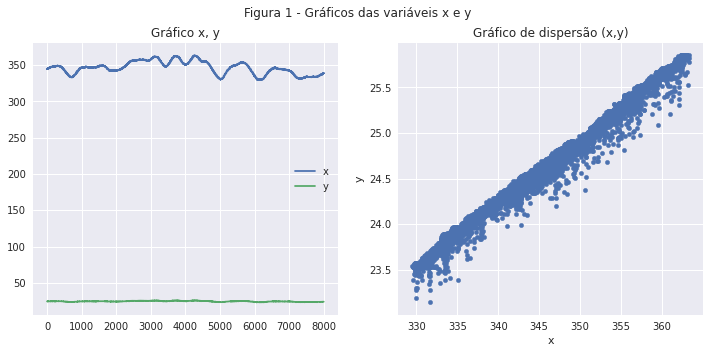

In [23]:
fig, ax = plt.subplots(figsize=(12,5), ncols=2)
Z[['x','y']].plot(ax=ax[0])
Z.plot(kind='scatter',x='x',y='y', ax=ax[1])
ax[0].set_title("Gráfico x, y")
ax[1].set_title("Gráfico de dispersão (x,y)")
plt.suptitle("Figura 1 - Gráficos das variáveis x e y");

A Figura $1$, no gráfico de x,y (à esquerda) mostra que, se analisadas separadamente, as variáveis $x$ e $y$ são muito diferentes: os valores da variável $x$ são muito maiores que os da variável $y$ e, visualmente, $x$ varia mais que $y$ ao longo das amostras.

No gráfico da direita, entretanto, o gráfico da dispersão entre $x$ e $y$ indica que pode haver uma correlação positiva entre as duas variáveis, pois para maiores valores de $x$ temos também maiores valores de $y$.

## 1.2

In [34]:
c1,pvalue = pearsonr(Z['x'],Z['y'])
c1, pvalue

(0.9937339736311894, 0.0)

Usando a totalidade dos dados a correlação entre $x$ e $y$ é $0.993$, um valor muito próximo de $1$, com um $P-$ value $=0.0$ < $0.05$, ou seja, as variáveis possuem uma correlação significativamente diferente de $0$.

In [37]:
Z_500 = Z.sample(500)
c2,pvalue = pearsonr(Z_500['x'],Z_500['y'])
c2, pvalue, c1-c2

(0.9928632057554339, 0.0, 0.0008707678757555737)

Usando $500$ pares $(x,y)$ selecionados aleatoriamente, temos uma correlação de $\approx 0.992$, apenas cerca de $1$ milésimo de diferença entre uma correlação em outra. Além disso, o $P-$ value ainda é $0$, indicando que a correlação entre as duas variáveis ainda é significativamente diferente de $0$

# Questão 2

## 2.1

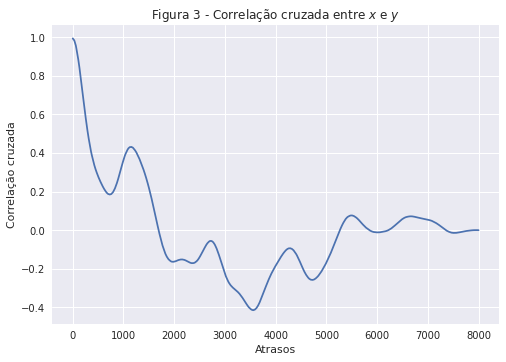

In [5]:
crus_corr = ccf(Z['x'],Z['y'], adjusted=False)
fig, ax = plt.subplots()
ax.plot(crus_corr)
ax.set_ylabel("Correlação cruzada")
ax.set_xlabel("Atrasos")
plt.title("Figura 3 - Correlação cruzada entre $x$ e $y$");

## 2.2

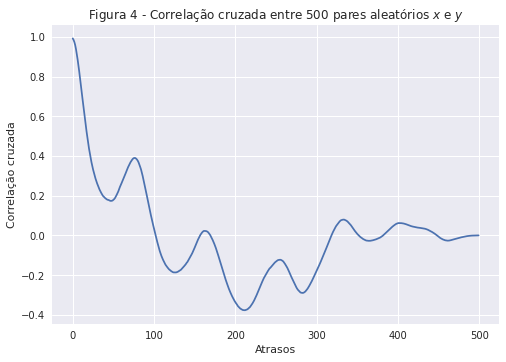

In [10]:
Z_500 = Z.sample(500)
Z_500.sort_index(inplace=True) # ordena
crus_corr = ccf(Z_500['x'],Z_500['y'], adjusted=False)
fig, ax = plt.subplots()
ax.plot(crus_corr)
ax.set_ylabel("Correlação cruzada")
ax.set_xlabel("Atrasos")
plt.title("Figura 4 - Correlação cruzada entre 500 pares aleatórios $x$ e $y$");

# Questão 3

## 3.1

In [66]:
Z_100 = Z.sample(100, random_state=42) # seleciono 100 amostras

In [67]:
Z_100.sort_index(inplace=True)

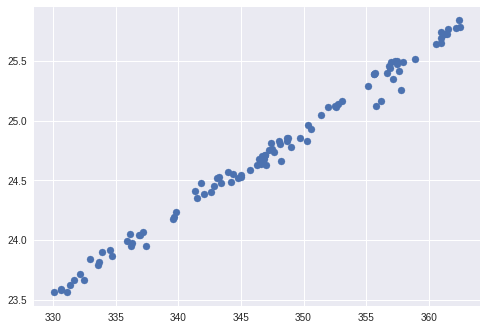

In [68]:
plt.scatter(Z_100['x'], Z_100['y'])

In [69]:
X = Z_100['x'].values
Y = Z_100['y'].values

In [70]:
A = np.vstack([X, np.ones(len(X))]).T
pinv = np.linalg.pinv(A)
b1, b0 = pinv.dot(Y)

In [71]:
b0, b1

(0.8931222056605588, 0.06865806555601038)

In [72]:
y_hat = [(b0 + b1*xi) for xi in X]

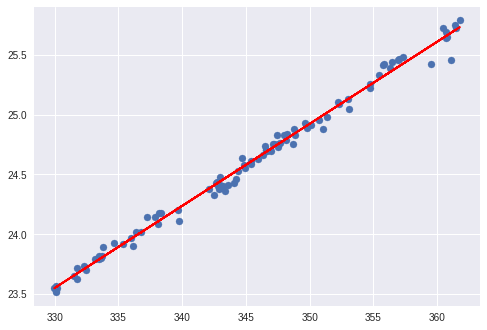

In [73]:
plt.scatter(X, Y)
plt.plot(X, y_hat, c='r')

In [17]:
betas_0 = []
betas_1 = []
# percorre todos pares
for xi, yi in Z_100.values:    
    x = np.array([xi])
    y = np.array([yi])    

    # b0 e b1 podem ser estimados usando a pseudoinversa
    A = np.vstack([x, np.ones(len(x))]).T
    pinv = np.linalg.pinv(A)
    b1, b0 = pinv.dot(y)
    betas_0.append(b0)
    betas_1.append(b1)    

''

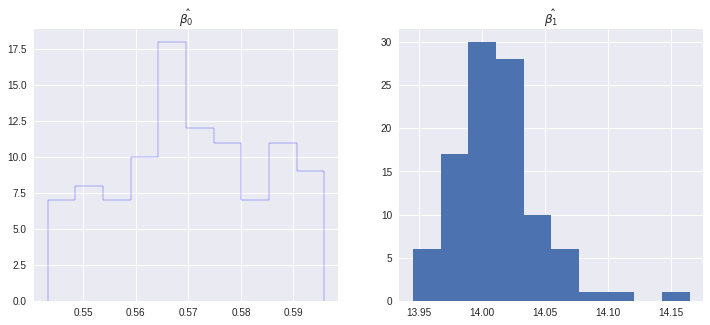

In [22]:
# TODO ver como fazer histograma com frequencia relativa
fig, ax = plt.subplots(figsize=(12, 5), ncols=2)
ax[0].hist(betas_0, histtype='step', color='blue')
ax[1].hist(betas_1)
ax[0].set_title(r'$\hat{\beta_0}$')
ax[1].set_title(r'$\hat{\beta_1}$');

## 3.2

A média de $E(B_1) = B_1$

A variância de $\hat{\beta_1}$: $V(\hat{\beta_1}) = \frac{\sigma^2}{S_{xx}}$

In [74]:
def calc_Sxx(X):
    sxx = np.power(X - np.mean(X), 2).sum()
    return sxx
def calc_SSe(y, y_hat):
    sse = np.power(np.array(y) - np.array(y_hat), 2).sum()
    return sse

In [55]:
# # calculo de b1 e b0 usando todos os dados
# X = Z_100['x'].values
# Y = Z_100['y'].values
# A = np.vstack([X, np.ones(len(X))]).T
# pinv = np.linalg.pinv(A)
# b1, b0 = pinv.dot(Y)
# Y_hat = [(b0 + b1*xi) for xi in X]

In [88]:
sxx = calc_Sxx(X)
sse = calc_SSe(Y, y_hat)
sigma2 = sse/(100-2)
varb1 = sigma2/sxx
varb1

3.5474332888830496e-07

In [89]:
np.sqrt(varb1)

0.000595603331831098

In [77]:
b0, b1

(0.8931222056605588, 0.06865806555601038)

Média de B1 = 0.07. Variância de $b1 = 3.5474332888830496e-07$

In [80]:
# por fórmula
varb0 = sigma2 * (1/100 + (np.mean(X)**2)/sxx)

Média de B0=0.9 e variância de b0 = 0.042222095766268126

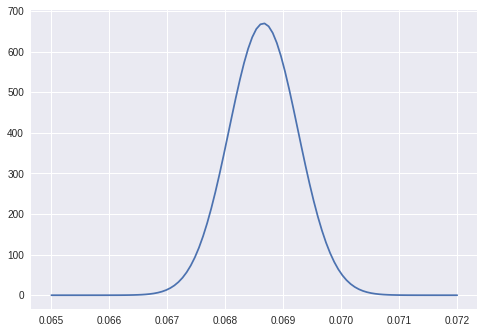

In [98]:
# X_b1 = np.linspace(b1-2*varb1, b1+2*varb1, 100)
X_b1 = np.linspace(0.065, 0.072, 100)
pdf_b1 = [norm.pdf(xi, loc=b1, scale=np.sqrt(varb1)) for xi in X_b1]
plt.plot(X_b1, pdf_b1)

In [40]:
X_exemplo = [0.99, 1.02, 1.15, 1.29, 1.46, 1.36, 0.87, 1.23, 1.55, 1.40, 1.19, 1.15, 0.98 , 1.01, 1.11, 1.20, 1.26, 1.32, 1.43, 0.95]
Y_exemplo = [90.01, 89.05, 91.43, 93.74, 96.73, 94.45, 87.59, 91.77, 99.42, 93.65, 93.54, 92.52, 90.56, 89.54, 89.85, 90.39, 93.25, 93.41, 94.98, 87.33]

In [61]:
calc_Sxx(X_exemplo)

0.68088

In [51]:
calc_SSe(Y_exemplo, Y_hat_exemplo)

21.249816875220365

In [54]:
sigma_2 = 21.249816875220365/(20-2)
sigma_2

1.180545381956687

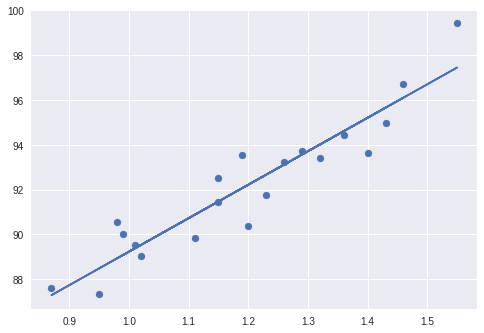

In [52]:
plt.scatter(X_exemplo, Y_exemplo)
plt.plot(X_exemplo, Y_hat_exemplo)

# 4

## 4.1

In [99]:
Z_100_4 = Z.sample(100, random_state=42)

In [103]:
Z_100

,y,x
263,24.851149,348.67197
465,24.590525,345.69131
483,24.529106,343.22345
487,24.475166,343.41574
518,24.352331,341.49277
...,...,...
7596,23.816664,333.64050
7731,23.792095,333.57639
7839,23.865797,334.66608
7940,24.039902,336.97369


In [104]:
Z_100_4

,y,x
2215,24.627375,347.03741
2582,25.401770,356.68445
1662,24.826582,348.67197
3027,25.514992,358.86383
4343,25.725948,361.17145
...,...,...
696,23.841230,332.96747
1009,24.627375,346.30026
6317,23.953918,336.20450
6595,24.676508,346.42844


In [100]:
def LR(x, y):
    A = np.vstack([x, np.ones(len(x))]).T
    pinv = np.linalg.pinv(A)
    b1, b0 = pinv.dot(y)
    return b1, b0

In [101]:
X_4, Y_4 = Z_100_4['x'], Z_100_4['y']
b1_4, b0_4 = LR(X_4, Y_4)

In [112]:
A = np.vstack([X_4, np.ones(len(X_4))]).T
mod = OLS(Y_4, A)

In [113]:
res = mod.fit()

In [116]:
b0

0.8931222056605588

In [115]:
# x1=b1, const=b0
res.conf_int(0.05)

,0,1
x1,0.067494,0.070026
const,0.420767,1.300082


In [114]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.162e+04
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          1.25e-103
Time:                        14:35:32   Log-Likelihood:                 142.08
No. Observations:                 100   AIC:                            -280.2
Df Residuals:                      98   BIC:                            -274.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0688      0.001    107.809      0.000       0.067       0.070
const          0.8604      0.222      3.884      0.000       0.421       1.300
==============================================================================
Omnibus:                       28.502   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.161
Skew:                          -1.199   Prob(JB):                     2.11e-11
Kurtosis:                       5.459   Cond. No.                     1.30e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [111]:
res.bse

x    0.000018
dtype: float64

## 4.2

# Questão 5

## 5.1

## 5.2

In [36]:
np.sum([1700, 1726, 1749, 1775, 1801])

8751

In [37]:
np.sum([1700.0, 1725.25, 1750.5, 1775.75, 1801.0])

8752.5